# Shallow Neuron Network (One hidden layer): Planar circle Data Classification


In [1]:
!pip install mlxtend  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

np.random.seed(1)

**2- Dataset**

In [36]:
# Loading dataset
X,Y=sklearn.datasets.make_circles(n_samples=100, noise=0.1)
X = X.T;
Y = np.reshape(Y, (-1, 1)).T;
print(X.shape)
print(Y.shape)


(2, 100)
(1, 100)


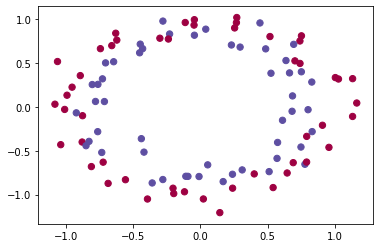

In [37]:
# Visualizing the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

We have a numpy-array (matrix) X that contains our features (x1, x2) and a numpy-array (vector) Y that contains our labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

In [38]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 100)
The shape of Y is: (1, 100)
I have m = 100 training examples!


**3 - Simple Logistic Regression** <BR>
Before building a full neural network, applying logistic regression to check, how it works on our data.


In [39]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


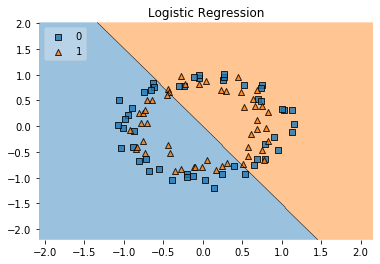

In [40]:
# Ploting the decision boundary for logistic regression
plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
plt.title("Logistic Regression")
plt.show();

# Print accuracy
LR_predictions = clf.predict(X.T)

In [41]:
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 52 % (percentage of correctly labelled datapoints)


In [42]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [43]:
def layer_sizes_test_case():
  return np.random.randn(5,10), np.random.randn(1,10)

In [44]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [45]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(2) 
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [46]:
def initialize_parameters_test_case():
  return 2,4,1

In [47]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [48]:
# sigmoid

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [49]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 =  np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [50]:
def forward_propagation_test_case():
    X_assess, Y_assess = layer_sizes_test_case();
    parameters = initialize_parameters(5, 4, 1)
    return X_assess, parameters

In [51]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0012527585449975322 -0.0012531998877107714 -6.892566042919505e-05 0.4999827685850393


In [52]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    m = Y.shape[1]

    logprobs = np.multiply(np.log(A2),Y) +  np.multiply(np.log(1-A2), (1-Y))
    cost = -1/m*np.sum(logprobs)
   
    cost = np.squeeze(cost)      
    assert(isinstance(cost, float))
    return cost

In [53]:
def compute_cost_test_case():
    A2 = np.ones((1,10))/2.0;
    Y_assess = np.concatenate((np.zeros((1,5)),np.ones((1,5))),axis=1);
    parameters = initialize_parameters(5, 4, 1);
    return A2, Y_assess, parameters

In [54]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6931471805599454


Implement the function backward_propagation().


In [55]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 =  cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2-Y
    dW2 = 1./m*np.dot(dZ2, A1.T)
    db2 = 1./m*np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1./m* np.dot(dZ1, X.T)
    db1 = 1./m*np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [56]:
def backward_propagation_test_case():
    X, parameters = forward_propagation_test_case()
    A2, cache = forward_propagation(X, parameters)
    Y = np.concatenate((np.zeros((1,5)),np.ones((1,5))),axis=1);
    np.random.shuffle(Y[0]);
    return parameters, cache, X, Y

In [57]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 7.13303754e-04 -2.86090069e-04  2.69839486e-04  4.83349622e-04
  -1.14231149e-03]
 [ 1.27047054e-04 -5.11594186e-05  4.80824121e-05  8.63649724e-05
  -2.03751744e-04]
 [-2.07322387e-04  8.41575901e-05 -7.87241739e-05 -1.41397662e-04
   3.34039637e-04]
 [ 8.03105764e-04 -3.23188643e-04  3.03788247e-04  5.45969037e-04
  -1.28767585e-03]]
db1 = [[ 7.38087443e-07]
 [ 1.80300045e-08]
 [-4.68161589e-07]
 [ 2.05825648e-07]]
dW2 = [[-0.00226315  0.00063123  0.00160882  0.00054182]]
db2 = [[-2.03394596e-05]]


In [58]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [59]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00627707 -0.00063607 -0.01917302  0.01387401 -0.01542489]
 [-0.00879198  0.00501482 -0.01206191 -0.01103109 -0.00864219]
 [ 0.00612691  0.02294348 -0.00022762 -0.01044017  0.00465513]
 [-0.00832883 -0.000274    0.01422653 -0.01033045  0.00292455]]
b1 = [[ 3.95550704e-06]
 [ 4.82737357e-07]
 [ 5.54009632e-07]
 [-2.39810108e-07]]
W2 = [[ 0.00542457 -0.0008663  -0.00079444 -0.01644457]]
b2 = [[2.08034842e-05]]


In [60]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
 
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [61]:
def nn_model_test_case():
    return np.ones((2,10))/2, np.zeros((1,10))

In [62]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.40346069  0.4070656 ]
 [ 0.35478202  0.39254669]
 [-0.50997623 -0.50045935]
 [-0.54769587 -0.56517756]]
b1 = [[ 0.81525654]
 [ 0.75228796]
 [-0.98408375]
 [-1.10544936]]
W2 = [[-1.26299362 -1.12623201  1.71780839  2.07306421]]
b2 = [[-5.45620365]]


In [63]:
# GRADED FUNCTION: predict

def predict(parameters, X):
       
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [64]:
def predict_test_case():
    X_assess, Y_assess = nn_model_test_case()
    parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
    return parameters, X_assess;

In [65]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.0


Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693125
Cost after iteration 2000: 0.693121
Cost after iteration 3000: 0.693098
Cost after iteration 4000: 0.657169
Cost after iteration 5000: 0.433762
Cost after iteration 6000: 0.419200
Cost after iteration 7000: 0.840979
Cost after iteration 8000: 0.342134
Cost after iteration 9000: 0.344782


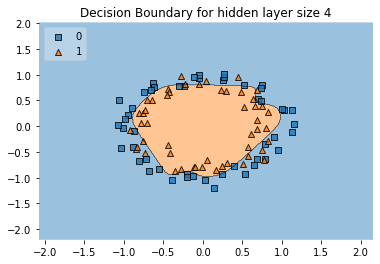

In [66]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

class clf(object):
    @staticmethod
    def predict(x):
        global predict
        return predict(parameters, x.T)

# Decision boundary
plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show();

In [67]:
# Printing accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 82%


Accuracy for 1 hidden units: 56.99999999999999 %
Accuracy for 2 hidden units: 65.0 %
Accuracy for 3 hidden units: 80.0 %
Accuracy for 4 hidden units: 74.0 %
Accuracy for 5 hidden units: 75.0 %
Accuracy for 20 hidden units: 57.99999999999999 %
Accuracy for 50 hidden units: 52.0 %


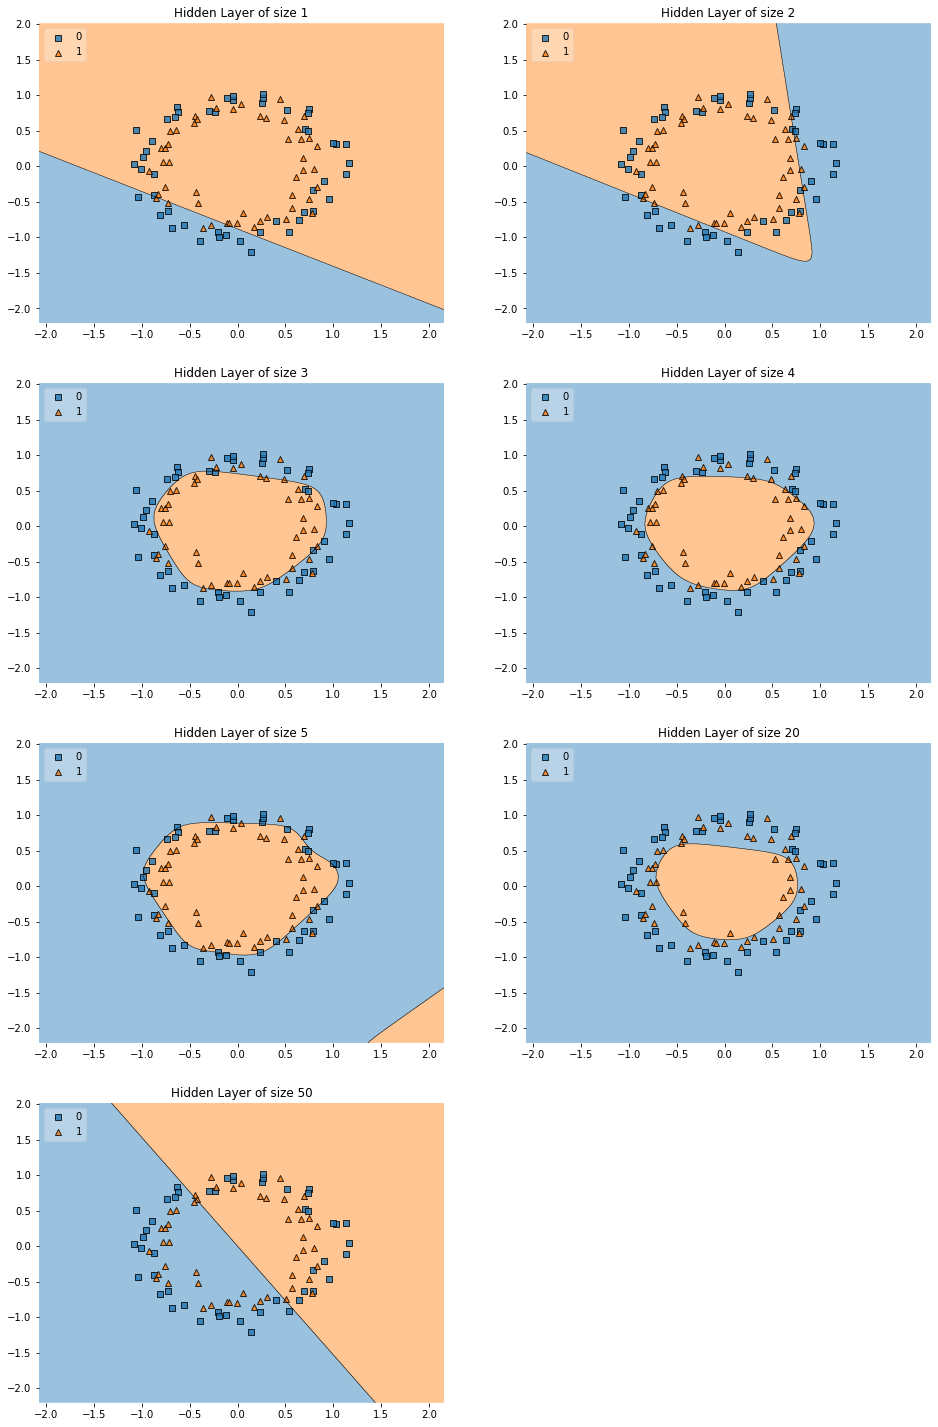

In [68]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Thank You